## Janhavi Kolte.
Task-2

02 - Intermediate Level

## Exploratory Data Analysis on Dataset - Terrorism
As a security/defense analyst, try to find out the hot zone of terrorism.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("globalterrorismdb_0718dist.csv",encoding = 'latin1')
data = df.copy()
data

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [4]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [5]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
data=data[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
data['casualities']=data['Killed']+data['Wounded']
data.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   city         181257 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   AttackType   181691 non-null  object 
 9   Killed       171378 non-null  float64
 10  Wounded      165380 non-null  float64
 11  Target       181055 non-null  object 
 12  Summary      115562 non-null  object 
 13  Group        181691 non-null  object 
 14  Target_type  181691 non-null  object 
 15  Weapon_type  181691 non-null  object 
 16  Motive       50561 non-null   object 
 17  casualities  164817 non-null  float64
dtypes: float64(5), int64(3),

In [7]:
data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
casualities     16874
dtype: int64

In [8]:
data.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded,casualities
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000,164817.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668,5.296128
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392,42.069023
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


In [9]:
data.shape

(181691, 18)

In [10]:
data.nunique()

Year               47
Month              13
Day                32
Country           205
Region             12
city            36674
latitude        48322
longitude       48039
AttackType          9
Killed            205
Wounded           238
Target          86006
Summary        112492
Group            3537
Target_type        22
Weapon_type        12
Motive          14490
casualities       341
dtype: int64

In [11]:
data.Year.dropna(inplace = True )

In [12]:
data.

SyntaxError: invalid syntax (<ipython-input-12-a4aa780eaf33>, line 1)

In [13]:
data.corr()

,Year,Month,Day,latitude,longitude,Killed,Wounded,casualities
Year,1.000000,0.000139,0.018254,0.166933,0.003917,0.015341,0.015273,0.013934
Month,0.000139,1.000000,0.005497,-0.015978,-0.003880,0.003463,0.002938,0.003446
Day,0.018254,0.005497,1.000000,0.003423,-0.002285,-0.003693,-0.001268,-0.001269
latitude,0.166933,-0.015978,0.003423,1.000000,0.001463,-0.018124,0.015988,0.009996
longitude,0.003917,-0.003880,-0.002285,0.001463,1.000000,-0.000562,0.000223,0.000021
Killed,0.015341,0.003463,-0.003693,-0.018124,-0.000562,1.000000,0.534375,0.690476
Wounded,0.015273,0.002938,-0.001268,0.015988,0.000223,0.534375,1.000000,0.980387
casualities,0.013934,0.003446,-0.001269,0.009996,0.000021,0.690476,0.980387,1.000000


<AxesSubplot:>

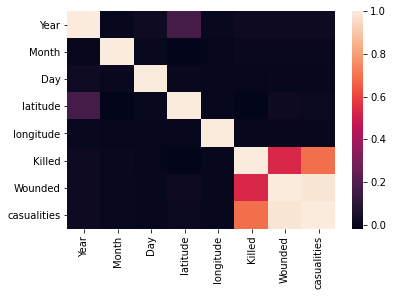

In [14]:
sns.heatmap(data.corr())

In [15]:
data['Year'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017], dtype=int64)

Text(0.5, 1.0, 'Number of attacks over years')

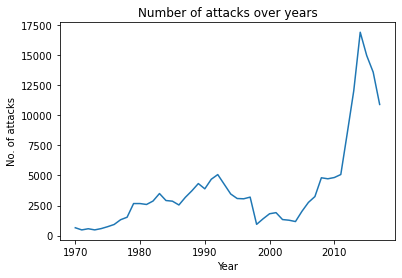

In [16]:
x = data["Year"].unique()
y = data["Year"].value_counts().sort_index()
sns.lineplot(x,y)
plt.xlabel("Year")
plt.ylabel("No. of attacks")
plt.title("Number of attacks over years")

#### The above graph shows that attacks have been maximum in after 2012

In [17]:
data.Killed.isnull().sum()


10313

In [18]:
data["Killed"].median()

0.0

In [19]:
data["Wounded"].median()

0.0

In [20]:
data.Killed.fillna(data["Killed"].median(),inplace = True)
data.Wounded.fillna(data["Wounded"].median(),inplace = True)

<AxesSubplot:title={'center':'Number of people killed every year'}, xlabel='Year', ylabel='Killed'>

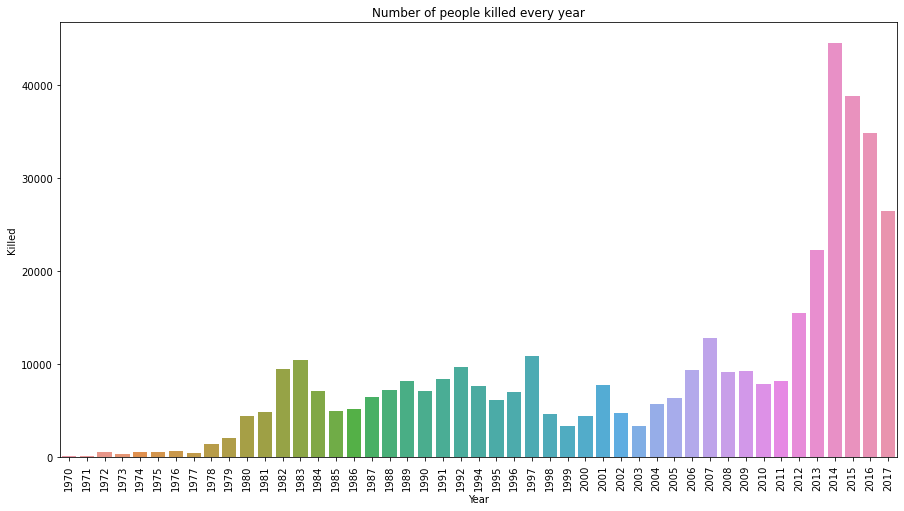

In [21]:
plt.figure(figsize = (15,8))
x1 = data["Year"].unique()
y1 = data["Killed"].groupby(data['Year']).sum()
plt.xticks(rotation = 90)
plt.xlabel("Year")
plt.ylabel("No.of people killed")
plt.title("Number of people killed every year")
sns.barplot(x1,y1)

#### The maximum number of people were killed in the year 2014 and the minimum in 1970s.

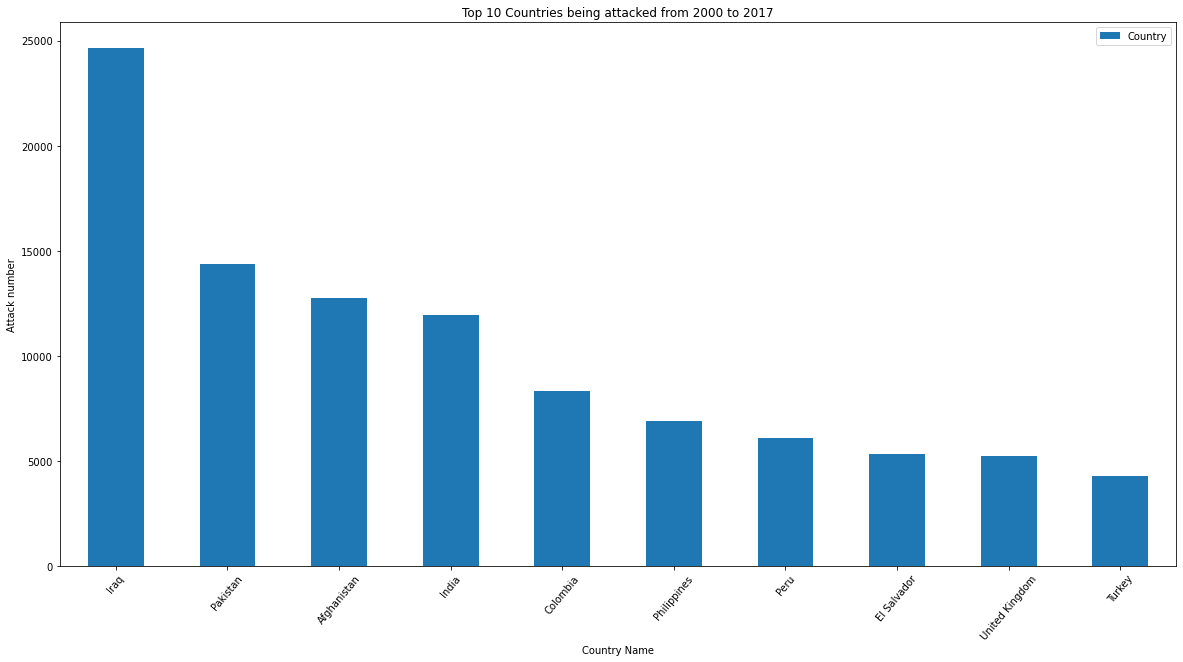

In [36]:
data['Country'].value_counts().to_frame().sort_values('Country',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10))
plt.title("Top 10 Countries being attacked from 2000 to 2017")
plt.xticks(rotation = 50)
plt.xlabel("Country Name")
plt.ylabel("Attack number")
plt.show()

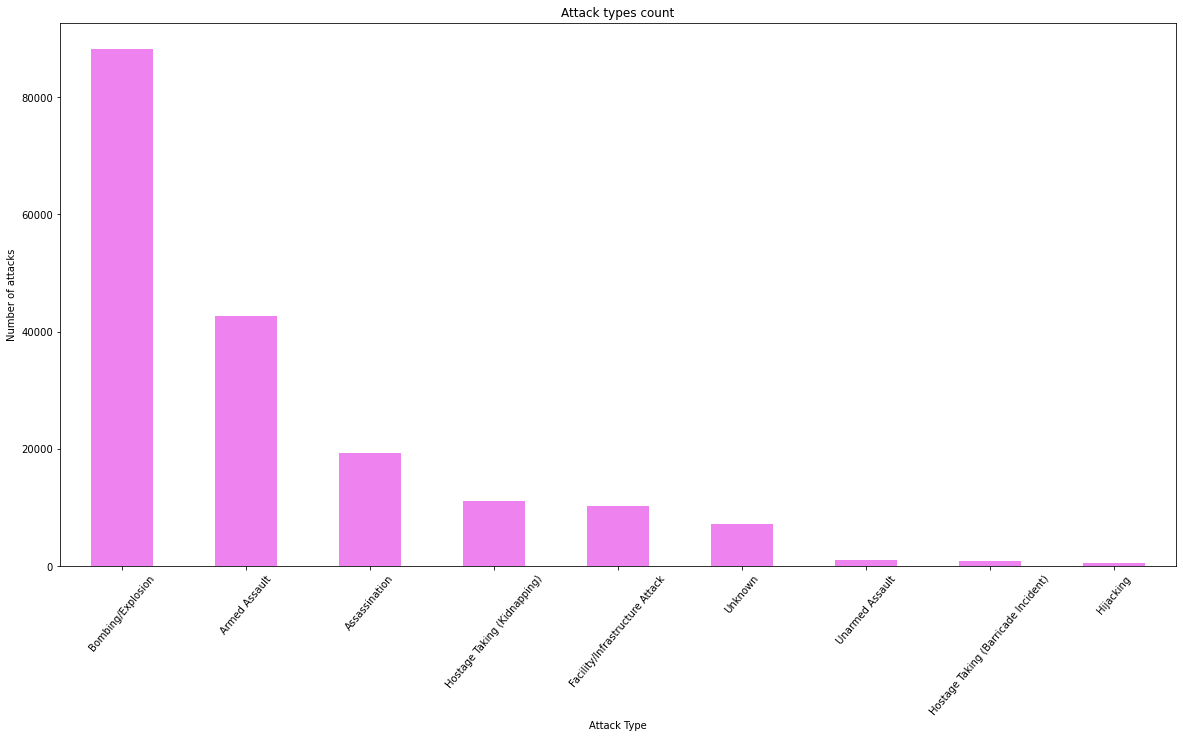

In [44]:
data['AttackType'].value_counts().plot(kind='bar',figsize=(20,10),color='violet')
plt.xticks(rotation = 50)
plt.xlabel("Attack Type")
plt.ylabel("Number of attacks")
plt.title("Attack types count")
plt.show()

In [23]:
data[data["Year"]>= 2000]["Year"].to_frame()

,Year
69835,2000
69836,2000
69837,2000
69838,2000
69839,2000
...,...
181686,2017
181687,2017
181688,2017
181689,2017


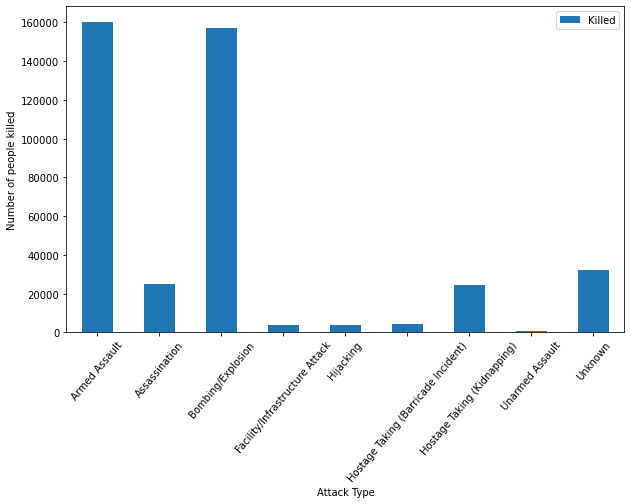

In [67]:
attacks = data[['Killed']].groupby(data['AttackType']).sum().plot(kind = 'bar',figsize = (10,6))
plt.xlabel("Attack Type")
plt.ylabel("Number of people killed")
plt.xticks(Rotation=50)
plt.show()

In [71]:
killed = data.loc[:,'Killed']
print('Number of people killed by terror attack:', int(sum(killed.dropna())))

Number of people killed by terror attack: 411868


In [75]:
df = data.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
df

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


In [78]:
#top 10 terrorist groups with most number of attacks
data.Group.value_counts()[1:11]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Name: Group, dtype: int64

#### 1 . Taliban has made the most number of attacks.

#### 2 . The maximum number of attacks and max number of people killed were in the year 2014.

#### 3 . Iraq is the most affected country with 24636 attacks.

#### 4 . Bombing/Explosion type attack were used most of time.

#### 5 . Private Citizen and Property Attacks were more as compared to other attack types.